In [35]:
# Библиотеки для работы с данными
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [36]:
# Настраиваем визуализацию
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [37]:
#Считываем данные CSV файла, используем IS_FOR_KAGGLE для переключения к пути данным файла
IS_FOR_KAGGLE = False

if IS_FOR_KAGGLE:
    trd = pd.read_csv('../input/train.csv')
    tsd = pd.read_csv('../input/test.csv')
else:
    trd = pd.read_csv('train.csv')
    tsd = pd.read_csv('test.csv')

td = pd.concat([trd, tsd], ignore_index=True, sort  = False)

### 1. Получение данных

In [38]:
td.shape

(1309, 12)

1309 строк и 12 столбцов

In [39]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### 2. Видим, что есть пустые значения
Столбцы, в которых отсутствуют значения:

- Age
- Cabin
- Embarked
- Fare
- Survived

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

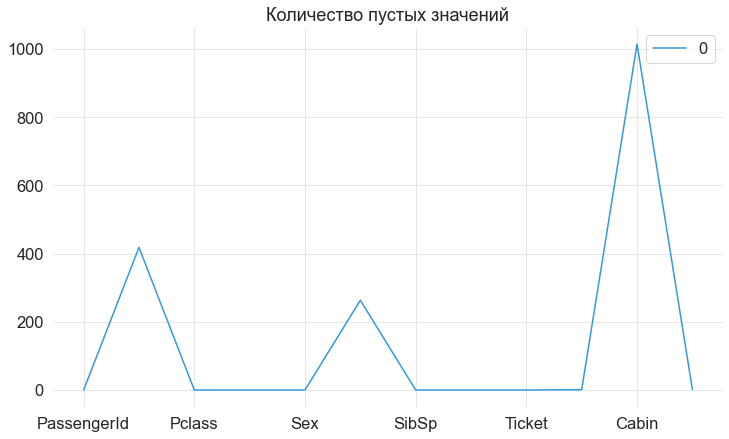

In [40]:
pd.DataFrame(td.isnull().sum()).plot.line().set_title("Количество пустых значений")
td.isnull().sum()

Text(0.5, 1.0, 'Графическое представление пустых значенийp')

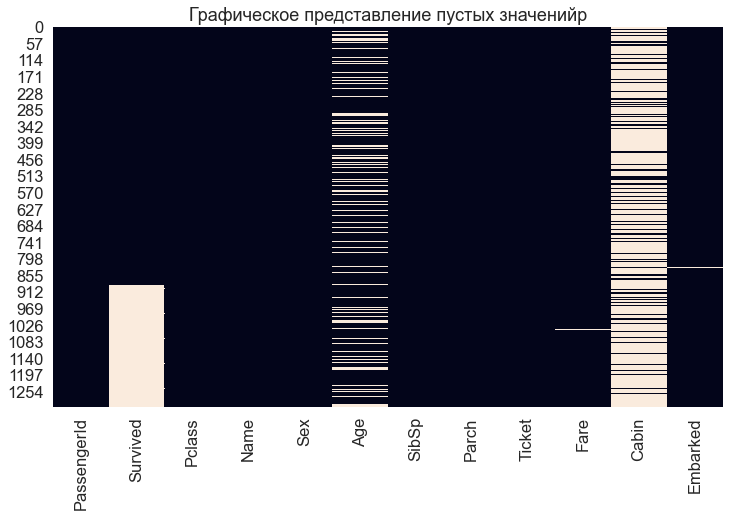

In [41]:
sns.heatmap(td.isnull(), cbar = False).set_title("Графическое представление пустых значенийp")


### 3. Количество уникальных значений

In [42]:
td.nunique()#все столбцы с количеством уникальных значений

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

### 4. Столбец "Survived" ###
Найдем соотношение между выжившими и погибшbми

Text(0.5, 1.0, 'Доля умерших и погибших')

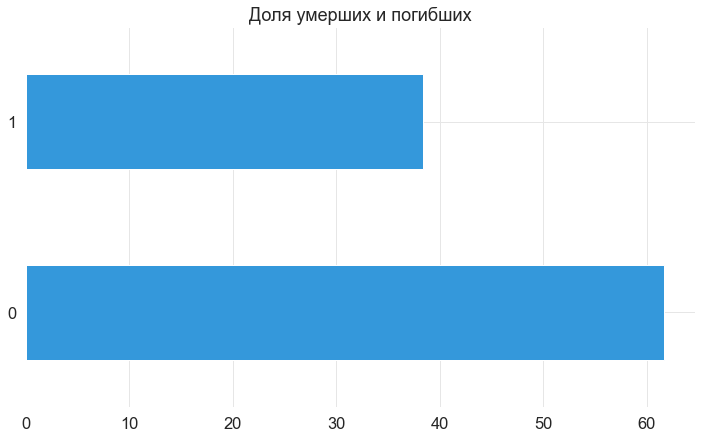

In [43]:
(trd.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Доля умерших и погибших")


### 5. Pclass ###


Найдем соотношение выживших и погибших в зависимости от класса.
В результате приведенного ниже анализа, выяснили, что из пассажиров первого класса 40% было спасено.Около 70% пассажиров второго класса погибли.Более 80% пассажиров третьего класса не выжили.




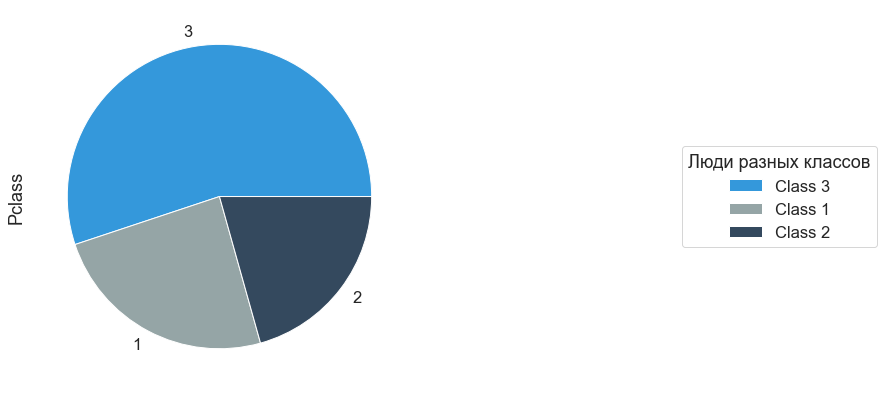

In [44]:
fig_pclass = trd.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Люди разных классов")


Text(0.5, 1.0, 'Соотношение выживших и погибших в каждом классе')

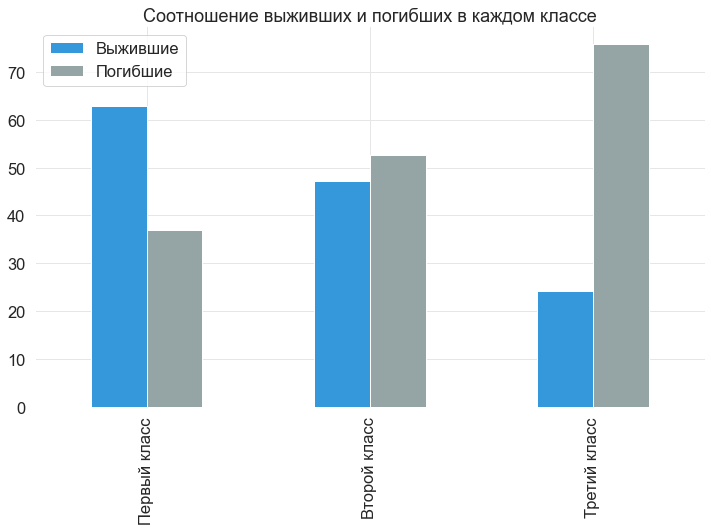

In [45]:
pclass_1_survivor_distribution = round((trd[trd.Pclass == 1].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((trd[trd.Pclass == 2].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((trd[trd.Pclass == 3].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Выжившие":{"Первый класс": pclass_1_survivor_distribution,"Второй класс": pclass_2_survivor_distribution, "Третий класс": pclass_3_survivor_distribution},  
     "Погибшие":{"Первый класс": 100-pclass_1_survivor_distribution,"Второй класс": 100-pclass_2_survivor_distribution, "Третий класс": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Соотношение выживших и погибших в каждом классе")

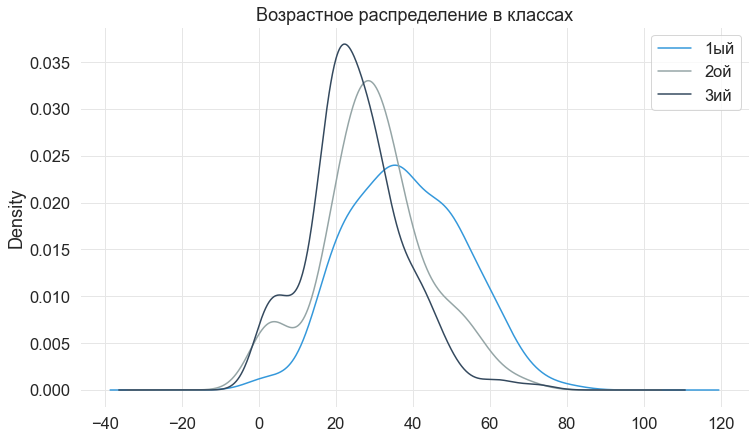

In [46]:
for x in [1,2,3]:    ## для всех классов
    trd.Age[trd.Pclass == x].plot(kind="kde")
plt.title("Возрастное распределение в классах")
plt.legend(("1ый","2ой","3ий"))

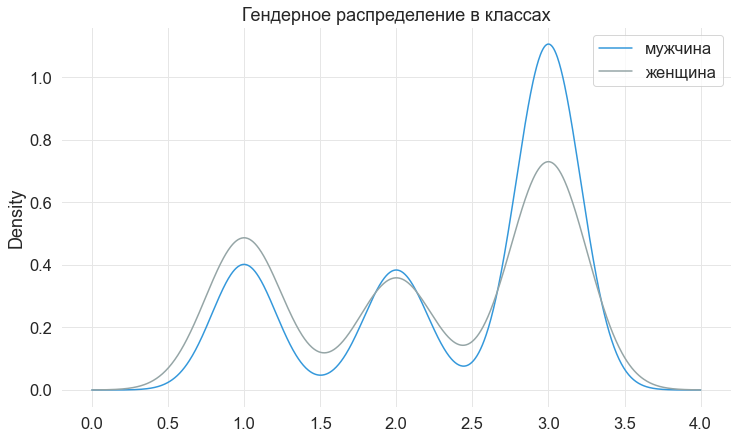

In [47]:
for x in ["male","female"]:
    td.Pclass[td.Sex == x].plot(kind="kde")
plt.title("Гендерное распределение в классах")
plt.legend(("мужчина","женщина"))

In [48]:
pclass_perc_df

,Выжившие,Погибшие
Первый класс,62.96,37.04
Второй класс,47.28,52.72
Третий класс,24.24,75.76


### 6. Столбец "Sex"

Из всех пассажиров, около 65% являлись мужчины, а остальные 35% - женщины.Процент выживших женщин оказался выше.

Более 80% пассажиров-мужчин погибли, а из женщин-70%.

<AxesSubplot:>

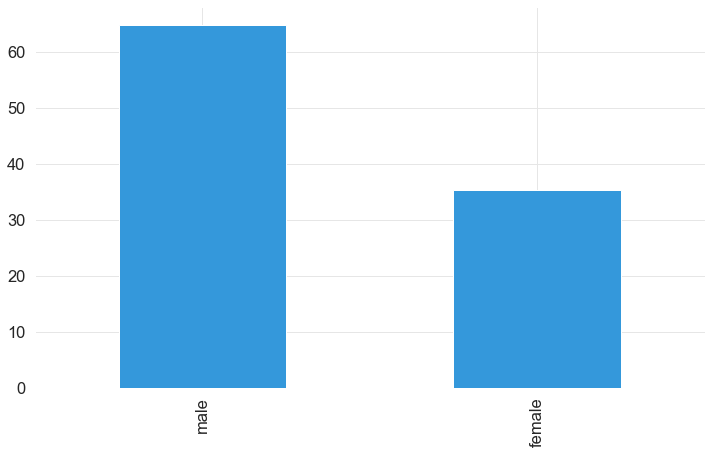

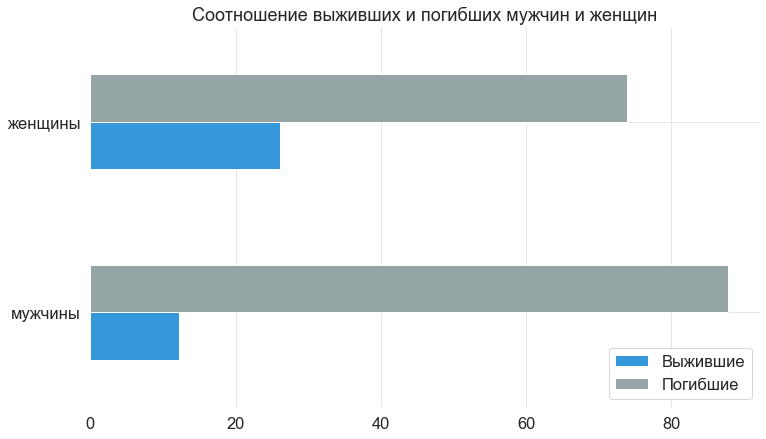

In [49]:
fig_sex = (trd.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((trd[trd.Sex == 'male'].Survived == 1).value_counts()[1]/len(trd.Sex) * 100, 2)
female_pr = round((trd[trd.Sex == 'female'].Survived == 1).value_counts()[1]/len(trd.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Выжившие":{"мужчины": male_pr,"женщины": female_pr},  "Погибшие":{"мужчины": 100-male_pr,"женщины": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Соотношение выживших и погибших мужчин и женщин")
fig_sex

### 7. Столбец "Age"

Возраст самомого молодого пассажира- около 2 месяцев, а самого старого- 80 лет. Средний возраст пассажиров- менее 30 лет. Самому старому пассажиру было 80 лет. Далее, будем строить график возрастного диапазона.

In [50]:
pd.DataFrame(td.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


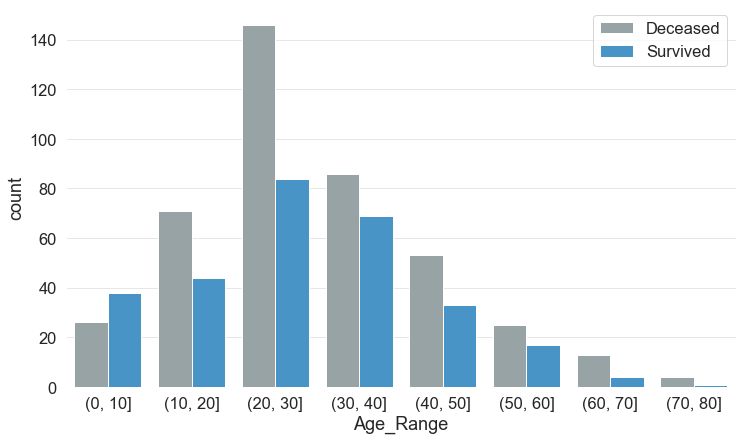

In [51]:
td['Age_Range'] = pd.cut(td.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])


C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

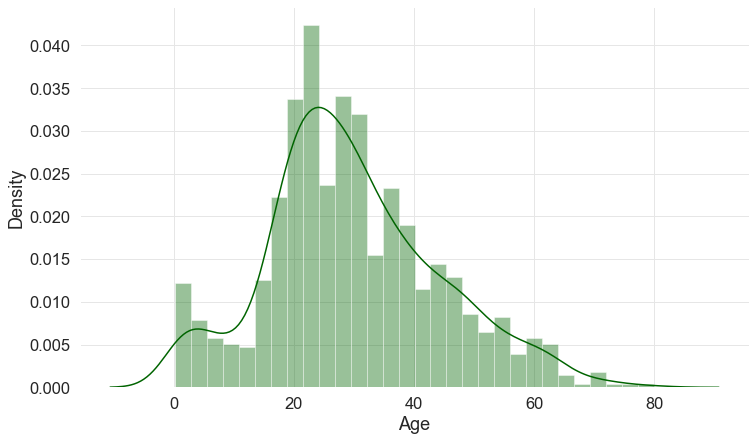

In [52]:
sns.distplot(td['Age'].dropna(),color='darkgreen',bins=30)

### 8. Столбец "SibSp"

Рассмотрим количество братьев, сестер или супругов на борту.
Более 90% людей путешествовали в одиночку или с одним из своих братьев, сестер или супругов.
Шансы на выживание падали, если пассажир путешествовал с более чем двумя братьями и сестрами.

In [53]:
td.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

Text(0.5, 1.0, 'Количество родственников в сравнении с количеством выживших')

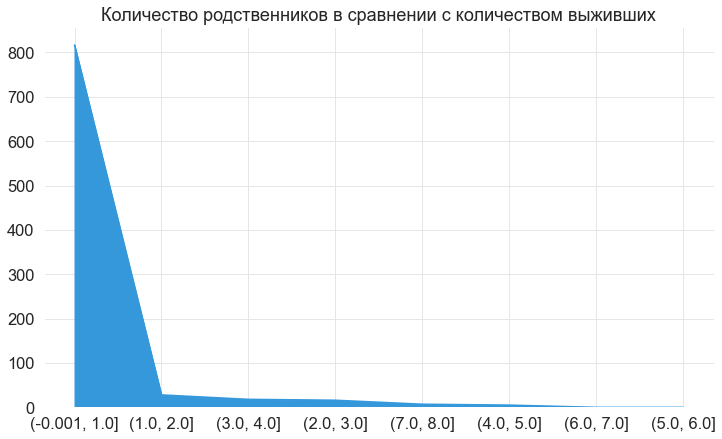

In [54]:
ss = pd.DataFrame()
ss['survived'] = trd.Survived
ss['sibling_spouse'] = pd.cut(trd.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(ss.sibling_spouse.value_counts()).plot.area().set_title("Количество родственников в сравнении с количеством выживших")

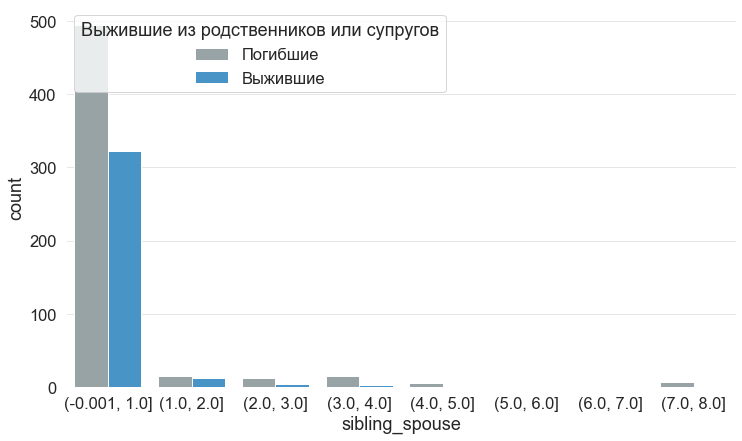

In [55]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = ss, palette=["C1", "C0"]).legend(labels = ["Погибшие", "Выжившие"])
x.set_title("Выжившие из родственников или супругов")

### 9. Столбец"Parch"

Рассмотрим количество родителей или детей, с которыми путешествовал каждый пассажир (максимум-9 родственников путешествовало с одним из пассажиров).

Мы создадим два новых столбца, столбец с именем family будет содержать сумму количества братьев и сестер / супругов и количества родителей / детей.Также, создаем столбец Is_Alone. Можем сделать вывод, что у людей, путешествующих в одиночку, были более высокие шансы на выживание.



In [57]:
pd.DataFrame(td.Parch.describe())

,Parch
count,1309.000000
mean,0.385027
std,0.865560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


Text(0.5, 1.0, 'Количество родителей/детей и плотность выживших')

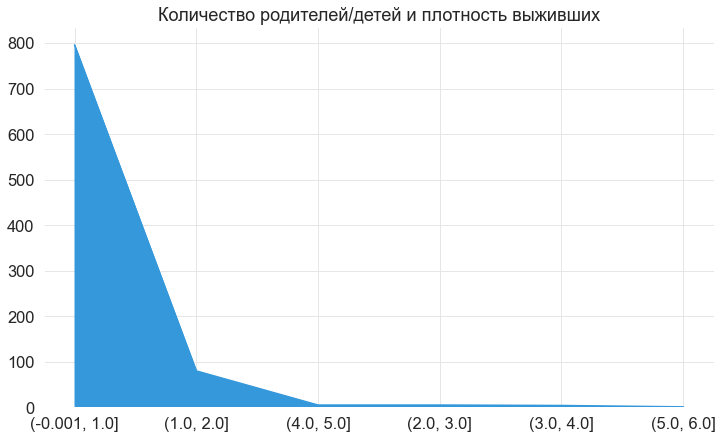

In [58]:
pc = pd.DataFrame()
pc['survived'] = trd.Survived
pc['parents_children'] = pd.cut(trd.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(pc.parents_children.value_counts()).plot.area().set_title("Количество родителей/детей и плотность выживших")

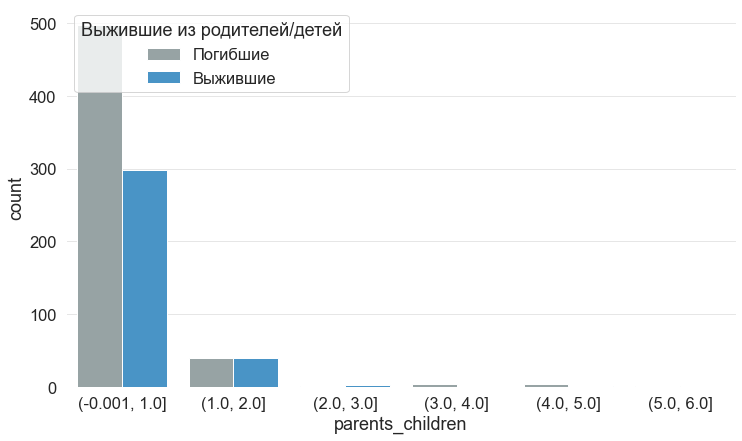

In [59]:
x = sns.countplot(x = "parents_children", hue = "survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Погибшие", "Выжившие"])
x.set_title("Выжившие из родителей/детей")


In [60]:
td['Family'] = td.Parch + td.SibSp
td['Is_Alone'] = td.Family == 0

### 10. Столбец"Fare"

Чем дороже билет пассажира, тем выше его шансы на выживание.

In [61]:
td.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [62]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])

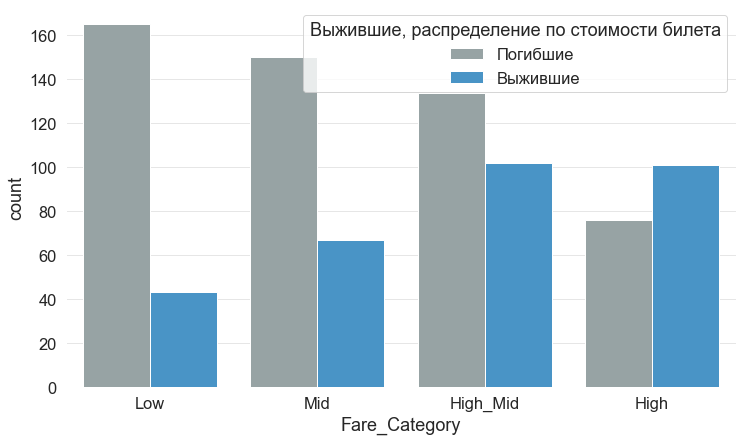

In [63]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Погибшие", "Выжившие"])
x.set_title("Выжившие, распределение по стоимости билета")


### 11. Столбец"Cabin"

В данном столбце много пустых значений


Embarked определяет место отправки пассажира (Саутгемптон, Шербур, Квинстаун).

По совокупным данным, более 70% людей сели из Саутгемптона. Чуть менее 20% - из Шербура, остальные - из Квинстауна.

Выжило больше людей, прибывших из Шербура.

Text(0.5, 1.0, 'Выжившие по месту отправления')

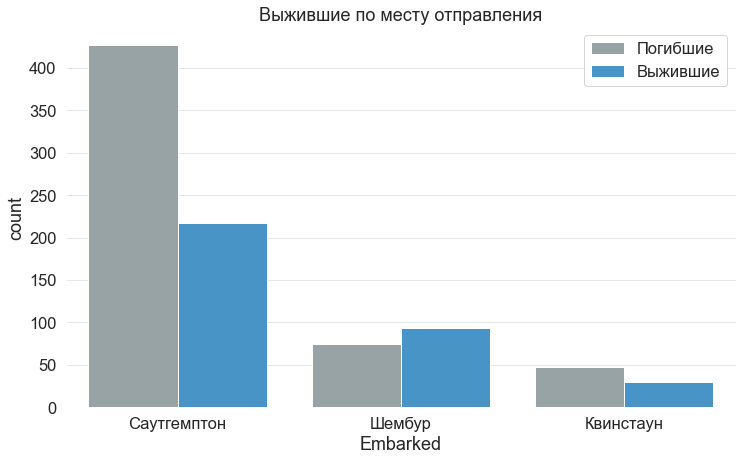

In [64]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = trd, palette=["C1", "C0"])
p.set_xticklabels(["Саутгемптон","Шембур","Квинстаун"])
p.legend(labels = ["Погибшие", "Выжившие"])
p.set_title("Выжившие по месту отправления")

# Data Imputation

### Embarked

Заменим неизвестный пункт назначения на самый вероятный( вместо того, чтобы вручную вводить Саутгемптон, мы найдем режим столбца Embarked и заменим им пропущенные значения).

In [65]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

### Age

Посчитаем средний возраст и заменим им пропущенные значения

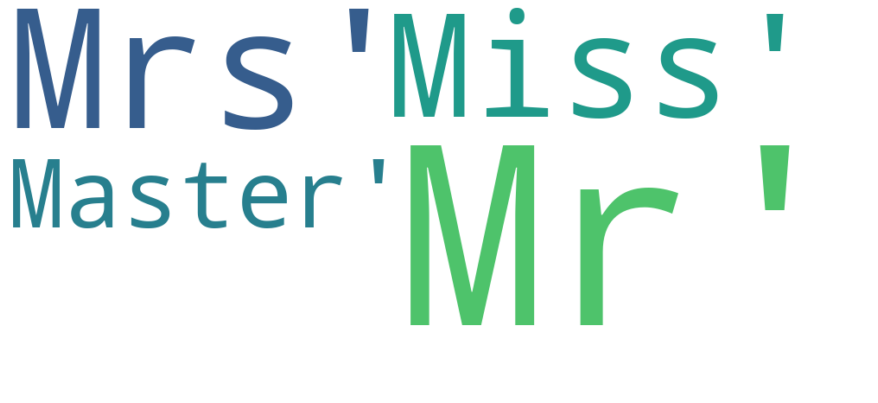

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Mme               1
Capt              1
Don               1
Dona              1
Name: Salutation, dtype: int64

In [66]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
td.Salutation.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(td.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

td.Salutation.value_counts()

In [67]:
grp = td.groupby(['Sex', 'Pclass'])  
td.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#на случай если еще пропущена какая-либо строка
td.Age.fillna(td.Age.median, inplace = True)

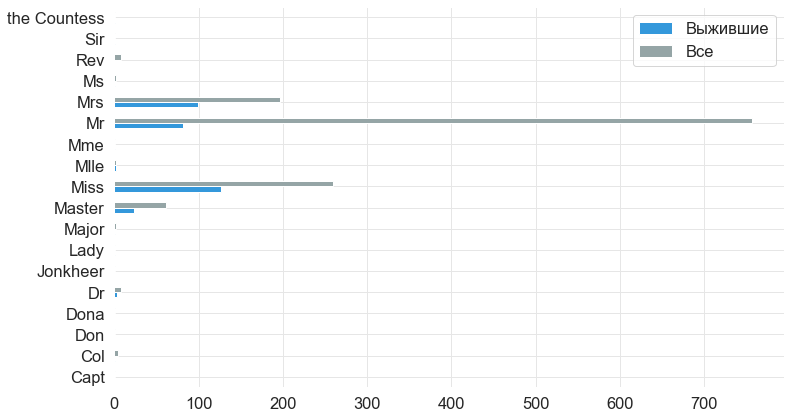

In [68]:
sal_df = pd.DataFrame({
    "Выжившие":
    td[td.Survived == 1].Salutation.value_counts(),
    "Все":
        td.Salutation.value_counts()
})
s = sal_df.plot.barh()

### Cabin

Назначение NA для пустых значений кают

In [69]:
td.Cabin = td.Cabin.fillna('NA')

# Encoding & dropping columns

Закодировали категориальные данные, далее отбрасываем все закодированные столбцы

In [70]:
td = pd.concat([td,pd.get_dummies(td.Cabin, prefix="Cabin"),pd.get_dummies(td.Age_Range, prefix="Age_Range"), pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(td.Salutation, prefix="Title", drop_first = True),pd.get_dummies(td.Fare_Category, prefix="Fare", drop_first = True), pd.get_dummies(td.Pclass, prefix="Class", drop_first = True)], axis=1)
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
td['Is_Alone'] = LabelEncoder().fit_transform(td['Is_Alone'])

In [71]:
td.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)


# Prediction

Используемые алгоритмы прогнозирования:

1. Gaussian Naive Bayes
2. Random Forest

NB Accuracy: 70.39%
The cross validated score for GNB is: 63.62


Text(0.5, 1.05, 'Confusion_matrix for NB')

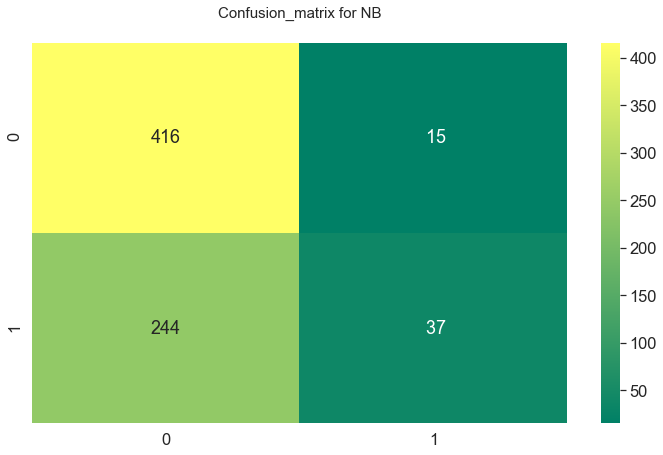

In [72]:
#прогнозируемые данные
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#обучаемые данные
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28

##Gaussian
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for GNB is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

RF Accuracy: 79.33%
The cross validated score for Random forest is: 83.84


Text(0.5, 1.05, 'Confusion_matrix for RF')

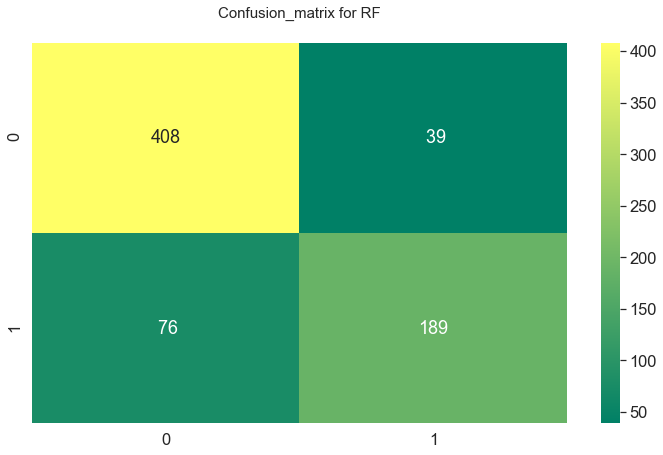

In [73]:
##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [74]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
